In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller,acf,pacf
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [130]:
df=df=pd.read_excel('DS3_C6_S4_TimeSeries_Sales_Data_Project.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Data Characteristics

In [131]:
df.shape

(9994, 21)

In [132]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [133]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9994.0,4997.500000,2885.163629,1.000,2499.25000,4997.5000,7495.750,9994.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [134]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### Separating Categorical and Numerical Data

In [135]:
categorical = []
continuous = []

for column in df.columns:
    if df[column].nunique() < 43:
        categorical.append(column)
    else:
        continuous.append(column)

print('Categorical : ',categorical)
print('\nContinuous : ',continuous)

Categorical :  ['Ship Mode', 'Segment', 'Country', 'Region', 'Category', 'Sub-Category', 'Quantity', 'Discount']

Continuous :  ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Customer ID', 'Customer Name', 'City', 'State', 'Postal Code', 'Product ID', 'Product Name', 'Sales', 'Profit']


## Data cleaning

In [136]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### Fortunately no null values are present in data

## Exploratory Data Analysis

### Univariate Analysis

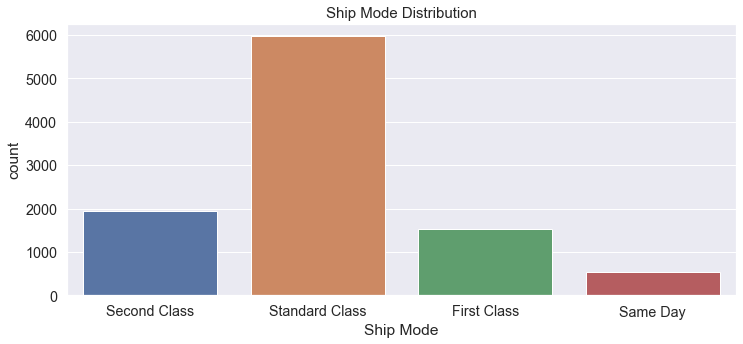

In [137]:
plt.figure(figsize=(12,5))
sns.countplot(df['Ship Mode'])
plt.title('Ship Mode Distribution', fontsize=15)
plt.show()

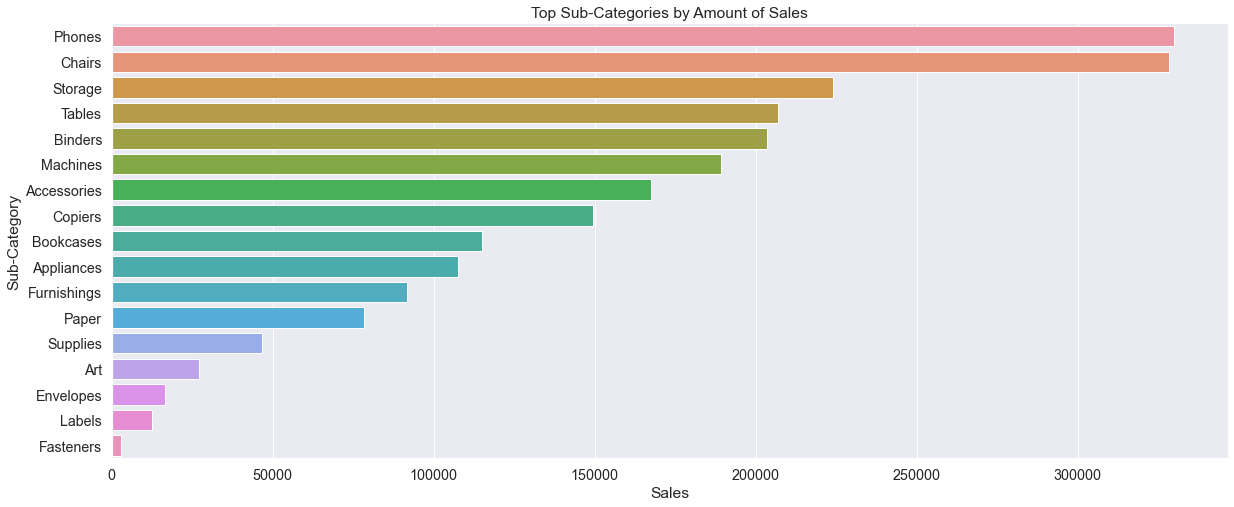

In [138]:
highestCategory = df.groupby(df["Sub-Category"]).sum()['Sales'].reset_index()
highestCategory = highestCategory.sort_values("Sales", ascending = False)

sns.set(font_scale=1.3)
plt.figure(figsize=(20,8));
plt.title('Top Sub-Categories by Amount of Sales')
sns.set_style('darkgrid')
sns.barplot(x='Sales', y='Sub-Category',data = highestCategory);

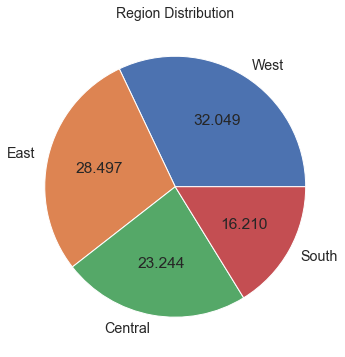

In [139]:
plt.figure(figsize=[6, 6])
plt.pie(df['Region'].value_counts(normalize=True), labels= df['Region'].value_counts().index, autopct="%.3f")
plt.title("Region Distribution", fontsize=14)
plt.show()

In [140]:
city = df['City'].value_counts().head(20)
city

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Dallas           157
Jacksonville     125
Detroit          115
Newark            95
Richmond          90
Jackson           82
Columbia          81
Aurora            68
Phoenix           63
Long Beach        61
Name: City, dtype: int64

These are top 20 cities that have placed the highest numbers of orders

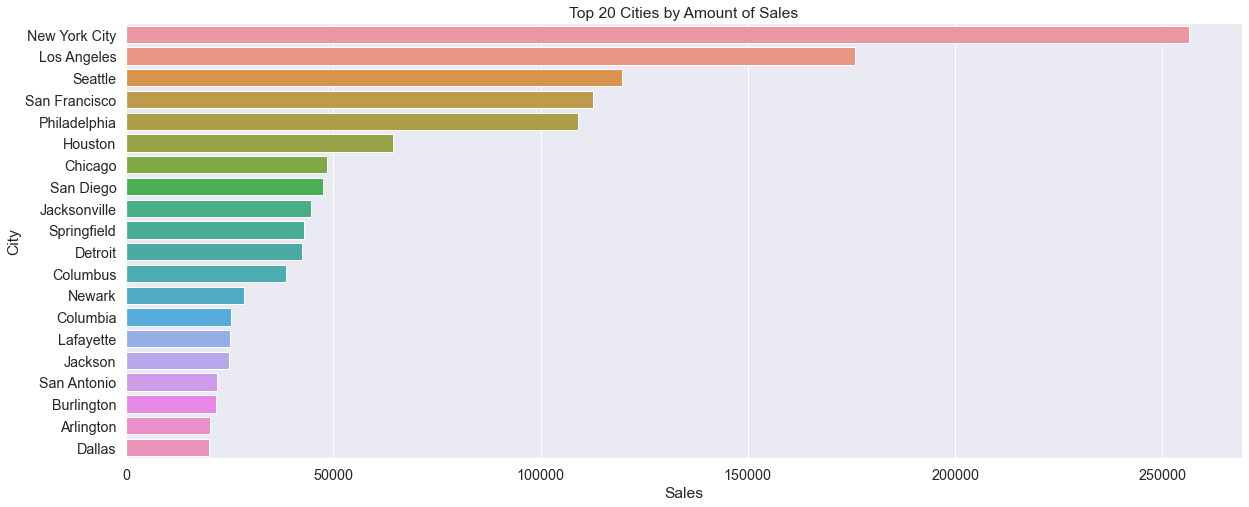

In [141]:
highestCities = pd.DataFrame(df.groupby(df['City']).sum()['Sales']).reset_index()
highestCities = highestCities.sort_values("Sales", ascending = False)

sns.set(font_scale=1.3)
plt.figure(figsize=(20,8));
plt.title('Top 20 Cities by Amount of Sales')
sns.set_style('darkgrid')
sns.barplot(x='Sales', y='City',data = highestCities.head(20));

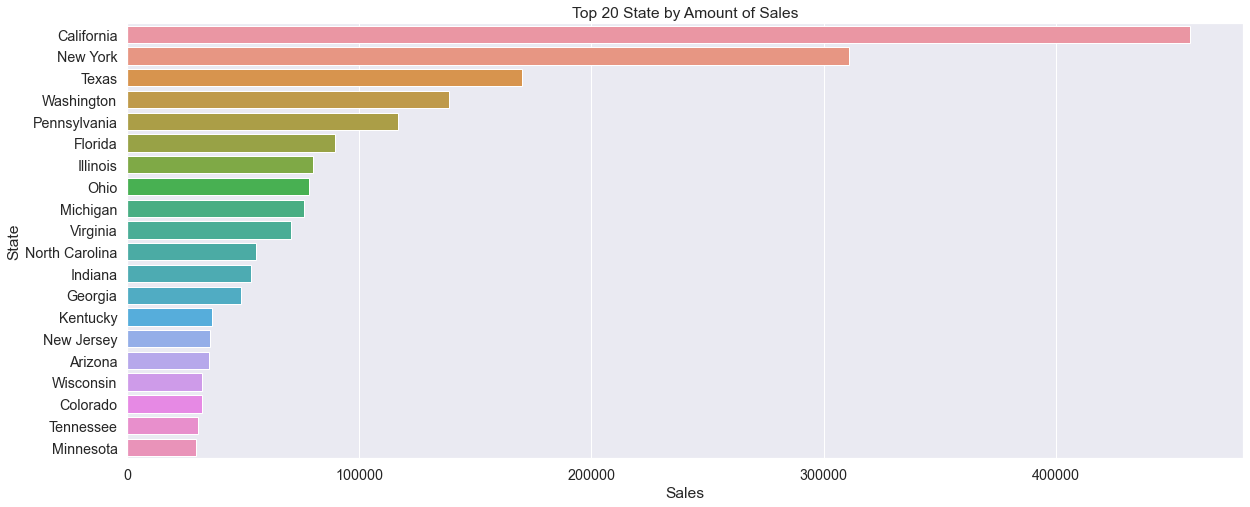

In [142]:
highestCities = pd.DataFrame(df.groupby(df['State']).sum()['Sales']).reset_index()
highestCities = highestCities.sort_values("Sales", ascending = False)

sns.set(font_scale=1.3)
plt.figure(figsize=(20,8));
plt.title('Top 20 State by Amount of Sales')
sns.set_style('darkgrid')
sns.barplot(x='Sales', y='State',data = highestCities.head(20));

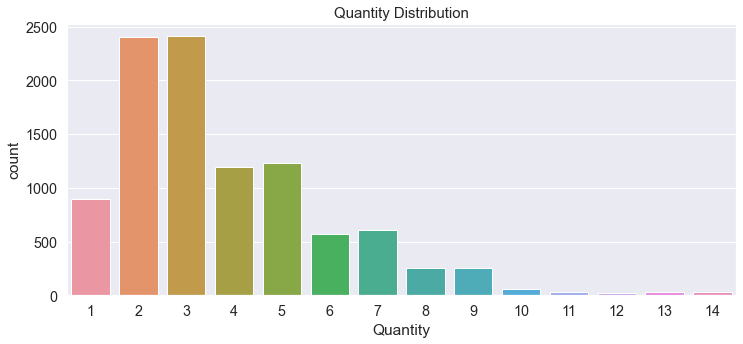

In [143]:
plt.figure(figsize=(12,5))
sns.countplot(df['Quantity'])
plt.title('Quantity Distribution', fontsize=15)
plt.show()

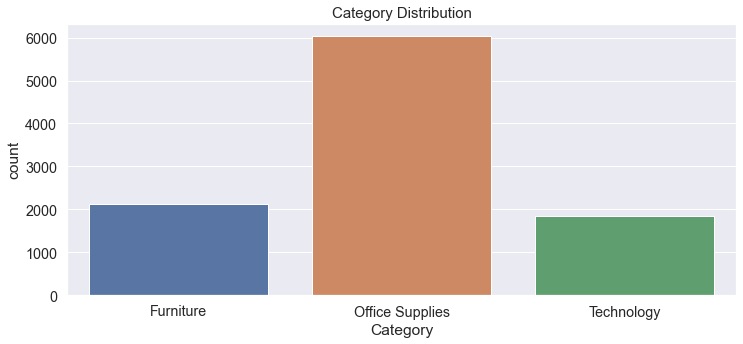

In [144]:
plt.figure(figsize=(12,5))
sns.countplot(df['Category'])
plt.title('Category Distribution', fontsize=15)
plt.show()

## Bivariate Analysis

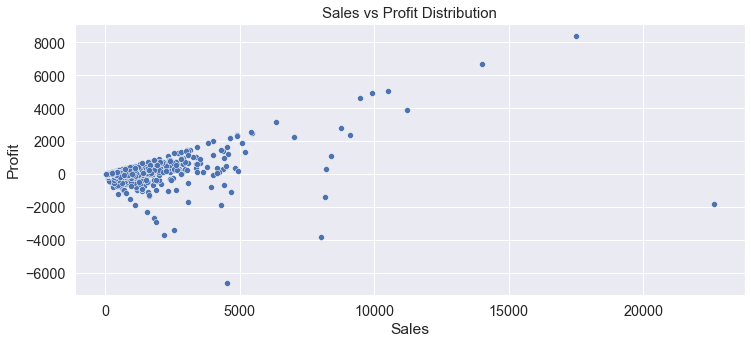

In [145]:
plt.figure(figsize=(12,5))
sns.scatterplot(df['Sales'], df['Profit'])
plt.title('Sales vs Profit Distribution', fontsize=15)
plt.show()

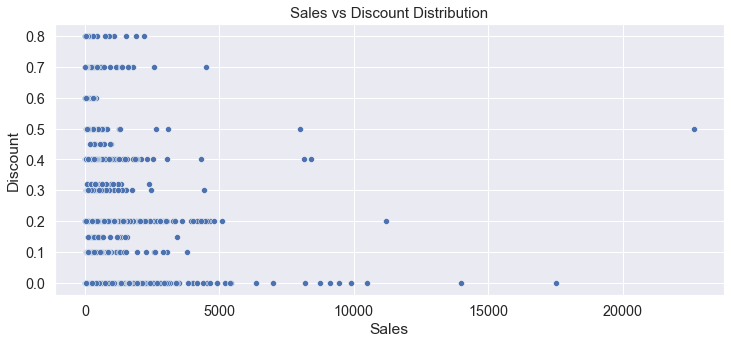

In [146]:
plt.figure(figsize=(12,5))
sns.scatterplot(df['Sales'], df['Discount'])
plt.title('Sales vs Discount Distribution', fontsize=15)
plt.show()

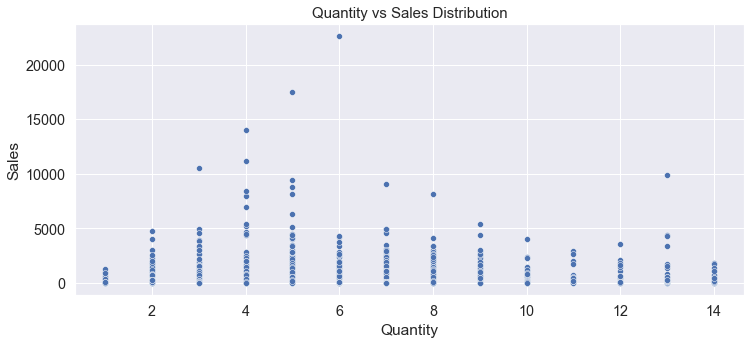

In [147]:
plt.figure(figsize=(12,5))
sns.scatterplot(df['Quantity'], df['Sales'])
plt.title('Quantity vs Sales Distribution', fontsize=15)
plt.show()

## Multivariate Analysis

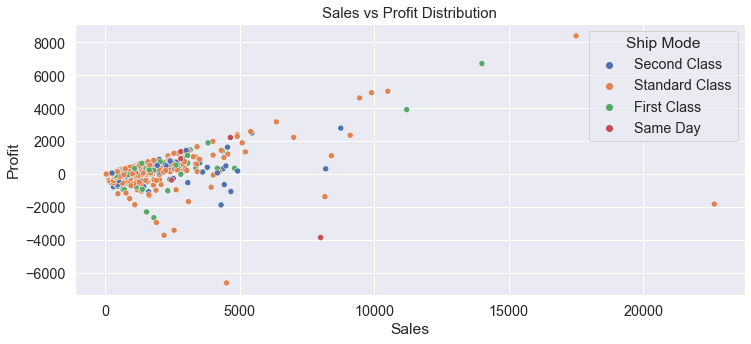

In [148]:
plt.figure(figsize=(12,5))
sns.scatterplot(df['Sales'], df['Profit'], hue=df['Ship Mode'])
plt.title('Sales vs Profit Distribution', fontsize=15)
plt.show()

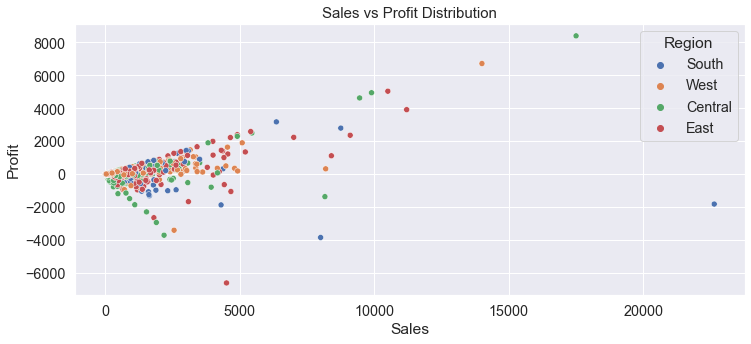

In [149]:
plt.figure(figsize=(12,5))
sns.scatterplot(df['Sales'], df['Profit'], hue=df['Region'])
plt.title('Sales vs Profit Distribution', fontsize=15)
plt.show()

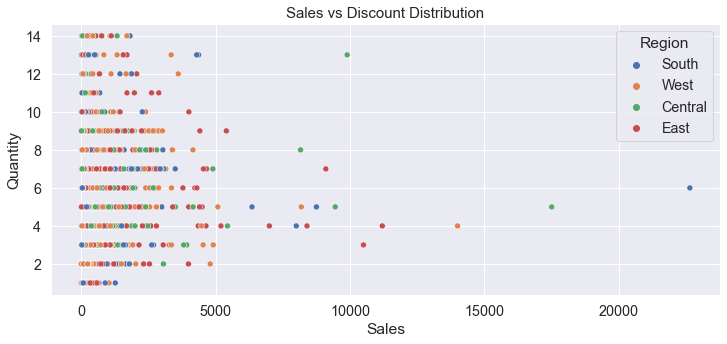

In [150]:
plt.figure(figsize=(12,5))
sns.scatterplot(df['Sales'], df['Quantity'], hue=df['Region'])
plt.title('Sales vs Discount Distribution', fontsize=15)
plt.show()

## Correlation

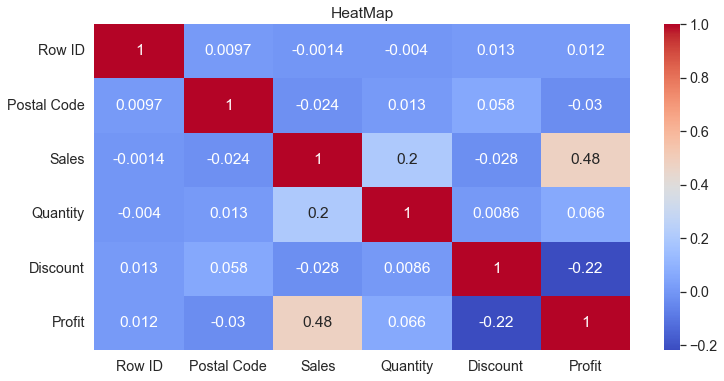

In [151]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('HeatMap')
plt.show()

Sales vs Profit - 0.48

Sales vs Quantity - 0.2


## Data Pre-processing

In [152]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf

In [153]:
# Setting order-date as in date_format
df['Order Date'] =  pd.to_datetime(df['Order Date'])

# Set date as an index
df.set_index('Order Date', inplace=True)

In [154]:
df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2016-06-12,3,CA-2016-138688,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2015-10-11,5,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [155]:
# Resampling of Order-date

df = df.resample('M').sum()
print(df.shape)
df.head()

(48, 6)


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Order Date,,,,,,
2014-01-31,346176,4342297,14236.895,284,10.00,2450.1907
2014-02-28,272235,3049775,4519.892,159,8.10,862.3084
2014-03-31,871575,8314538,55691.009,585,26.30,498.7299
2014-04-30,690625,7723827,28295.345,536,14.85,3488.8352
2014-05-31,611708,6497804,23648.287,466,18.95,2738.7096


In [156]:
df1 = df['Sales']
df1.head()

Order Date
2014-01-31    14236.895
2014-02-28     4519.892
2014-03-31    55691.009
2014-04-30    28295.345
2014-05-31    23648.287
Freq: M, Name: Sales, dtype: float64

### Splitting the data into train and test

In [157]:


ss = int(0.7 * len(df1))

train = df1.iloc[:ss]
test = df1.iloc[ss:]

print('Train : ',len(train), '\t Test : ',len(test))

Train :  33 	 Test :  15


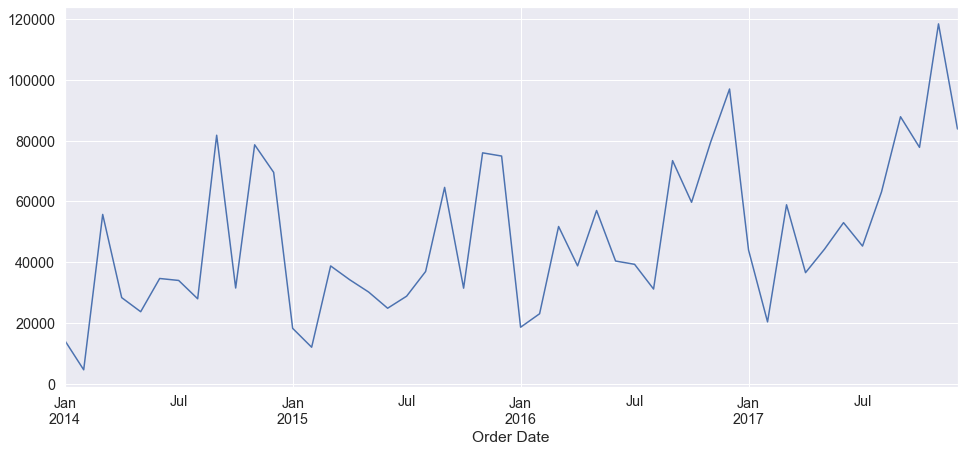

In [158]:
plt.figure(figsize=(16,7))
df1.plot()
plt.show()

### Visual inspection of data

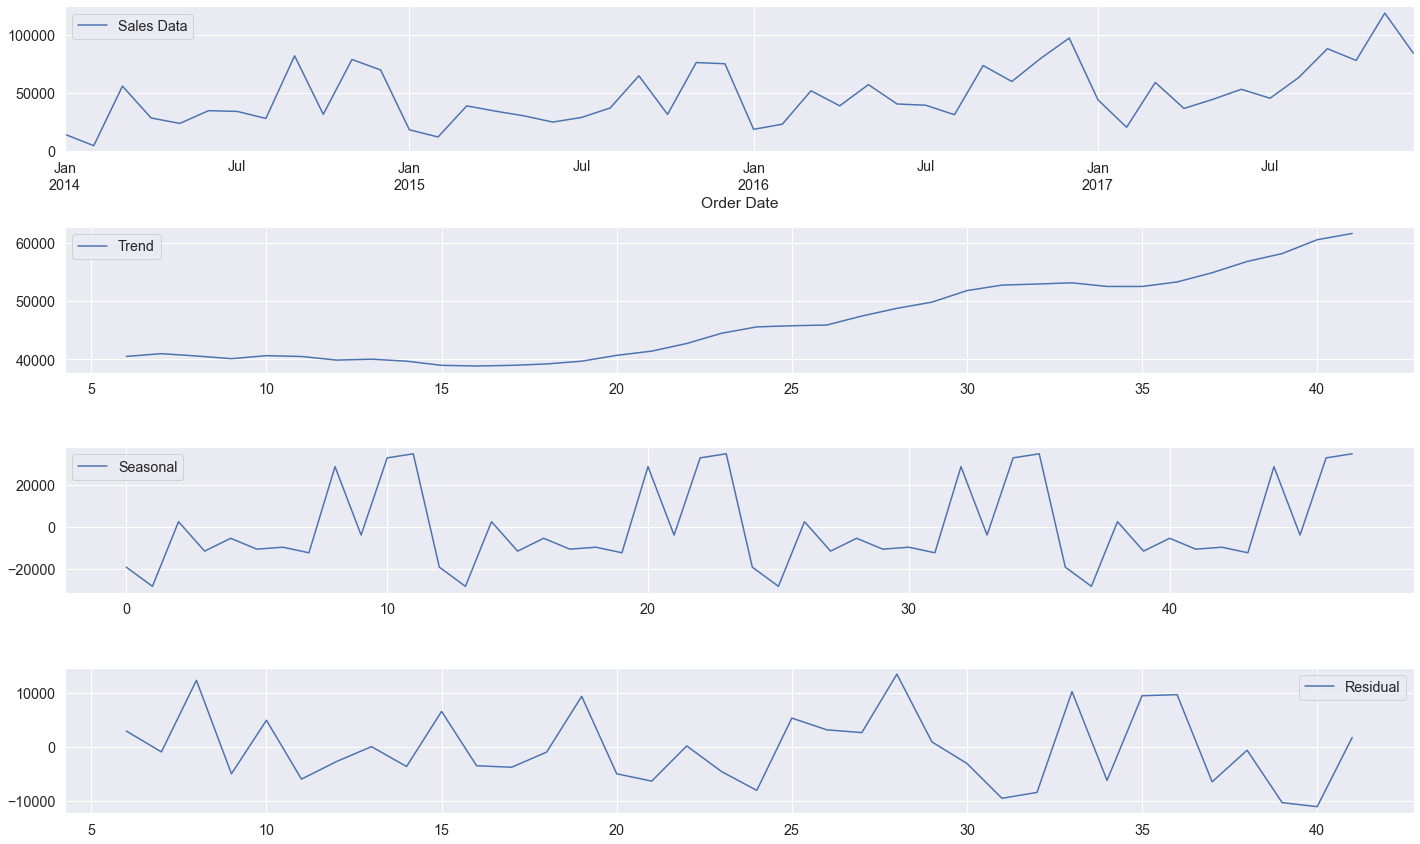

In [159]:


decomposition = seasonal_decompose(np.asarray(df1), freq=12)

d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
# plt.plot(df1,label='Sales Data')
df1.plot(label='Sales Data')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

### Checking stationarity of data

In [160]:
def stationaritycheck(data):
    pvalue = adfuller(data)[1]
    if (pvalue < 0.05):
        print('P-value =',pvalue,'. Data is stationary now proceed for model building')
    else:
        print('P-value =',pvalue,'. Data is not stationary now make data stationarity then proceed for model building')

In [161]:
print(stationaritycheck(train))

P-value = 0.0003416968790973095 . Data is stationary now proceed for model building
None


In [162]:
print(stationaritycheck(test))

P-value = 0.5665510383214007 . Data is not stationary now make data stationarity then proceed for model building
None


### Doing Stationarity for test data

In [163]:
diff_df = test - test.shift()
print(diff_df)

Order Date
2016-10-31           NaN
2016-11-30    19724.2208
2016-12-31    17587.0772
2017-01-31   -53027.6690
2017-02-28   -23670.2406
2017-03-31    38571.2194
2017-04-30   -22350.8167
2017-05-31     7739.5741
2017-06-30     8720.6155
2017-07-31    -7717.3097
2017-08-31    17856.4720
2017-09-30    24745.7640
2017-10-31   -10089.7288
2017-11-30    40670.9018
2017-12-31   -34618.5062
Freq: M, Name: Sales, dtype: float64


In [164]:
# removing null values

print('Before removing numm values : ',len(diff_df))
diff_df.dropna(inplace=True)
print('After removing null value : ',len(diff_df))
diff_df

Before removing numm values :  15
After removing null value :  14


Order Date
2016-11-30    19724.2208
2016-12-31    17587.0772
2017-01-31   -53027.6690
2017-02-28   -23670.2406
2017-03-31    38571.2194
2017-04-30   -22350.8167
2017-05-31     7739.5741
2017-06-30     8720.6155
2017-07-31    -7717.3097
2017-08-31    17856.4720
2017-09-30    24745.7640
2017-10-31   -10089.7288
2017-11-30    40670.9018
2017-12-31   -34618.5062
Freq: M, Name: Sales, dtype: float64

In [165]:
print(stationaritycheck(diff_df))

P-value = 0.0002055220477607508 . Data is stationary now proceed for model building
None


### Plotting ACF and PACF

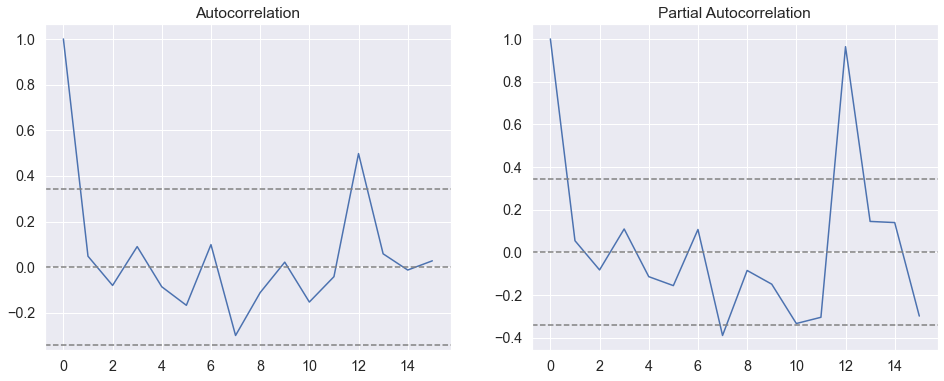

In [166]:
lag_pcf = acf(train, nlags=15)
lag_pacf = pacf(train, nlags=15, method='ols')

# For ACF

fig, ax = plt.subplots(figsize=(16,6))
plt.subplot(121)
plt.plot(lag_pcf)
plt.title('Autocorrelation')
plt.axhline(y= -1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.axhline(y= 0 , linestyle='--', color='gray')
plt.axhline(y= 1.96/np.sqrt(len(train)), linestyle='--', color='gray')

# For PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.title('Partial Autocorrelation')
plt.axhline(y= -1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.axhline(y= 0, linestyle='--', color='gray')
plt.axhline(y= 1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.show()

## Model Evaluation

In [167]:
from statsmodels.tsa.arima.model import ARIMA

In [168]:
model1 = ARIMA(train, order=(1,0,2))
result1 = model1.fit()
model2 = ARIMA(train, order=(2,0,2))
result2 = model2.fit()
model3 = ARIMA(train, order=(3,0,1))
result3 = model3.fit()
model4 = ARIMA(train, order=(4,0,2))
result4 = model4.fit()
model5 = ARIMA(train, order=(3,0,2))
result5 = model4.fit()

print('ARIMA(1,0,2) : \t LL = ',result1.llf, '\t AIC = ',result1.aic)
print('ARIMA(2,0,2) : \t LL = ',result2.llf, '\t AIC = ',result2.aic)
print('ARIMA(3,0,1) : \t LL = ',result3.llf, '\t AIC = ',result3.aic)
print('ARIMA(4,0,2) : \t LL = ',result4.llf, '\t AIC = ',result4.aic)
print('ARIMA(3,0,2) : \t LL = ',result5.llf, '\t AIC = ',result5.aic)

ARIMA(1,0,2) : 	 LL =  -374.7345368697664 	 AIC =  759.4690737395327
ARIMA(2,0,2) : 	 LL =  -372.6788323965556 	 AIC =  757.3576647931112
ARIMA(3,0,1) : 	 LL =  -374.5612492103068 	 AIC =  761.1224984206136
ARIMA(4,0,2) : 	 LL =  -372.7357183149493 	 AIC =  761.4714366298986
ARIMA(3,0,2) : 	 LL =  -372.7357183149493 	 AIC =  761.4714366298986


In [169]:
print('Order - (1,0,2) is giving high liklihood and minimum AIC and LL')

Order - (1,0,2) is giving high liklihood and minimum AIC and LL


## ARIMA Model

In [170]:
p=2; q=2 ; d=0

m1 = ARIMA(train, order=(p,d,q)).fit()
print(m1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   33
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -372.679
Date:                Tue, 24 May 2022   AIC                            757.358
Time:                        20:08:33   BIC                            766.337
Sample:                    01-31-2014   HQIC                           760.379
                         - 09-30-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.024e+04   6421.453      6.266      0.000    2.77e+04    5.28e+04
ar.L1         -1.0347      0.120     -8.587      0.000      -1.271      -0.799
ar.L2         -0.9860      0.127     -7.782      0.0

In [171]:
start = len(train)
end = len(train) + len(test) - 1

print('Start : ',start,'\t End : ',end)

prediction1 = m1.predict(start, end)
prediction1

Start :  33 	 End :  47


2016-10-31    29683.800925
2016-11-30    41244.755891
2016-12-31    49605.406644
2017-01-31    29556.164280
2017-02-28    42057.302939
2017-03-31    48890.530021
2017-04-30    29494.686566
2017-05-31    42825.755223
2017-06-30    48156.046783
2017-07-31    29496.971181
2017-08-31    43547.565666
2017-09-30    47406.955292
2017-10-31    29560.357778
2017-11-30    44220.558657
2017-12-31    46648.129605
Freq: M, Name: predicted_mean, dtype: float64

In [172]:
# Calculating the actual, predicted and error values 

actual1=[]; pred1=[]

for i in range(len(prediction1)):
    actual1.append(test[i])
    pred1.append(prediction1[i])

df_final1 = pd.DataFrame({'Actual' : actual1, 'Predicted': pred1})
df_final1['Error'] = df_final1['Actual'] - df_final1['Predicted']
df_final1.head()

,Actual,Predicted,Error
0,59687.7450,29683.800925,30003.944075
1,79411.9658,41244.755891,38167.209909
2,96999.0430,49605.406644,47393.636356
3,43971.3740,29556.164280,14415.209720
4,20301.1334,42057.302939,-21756.169539


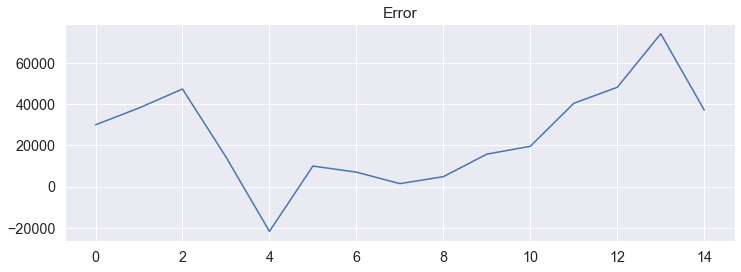

In [173]:
# Plotting the model

plt.subplots(figsize=(12,4))
plt.plot(df_final1.Error)
plt.title('Error')
plt.show()

### Plotting the actual and Predicted values

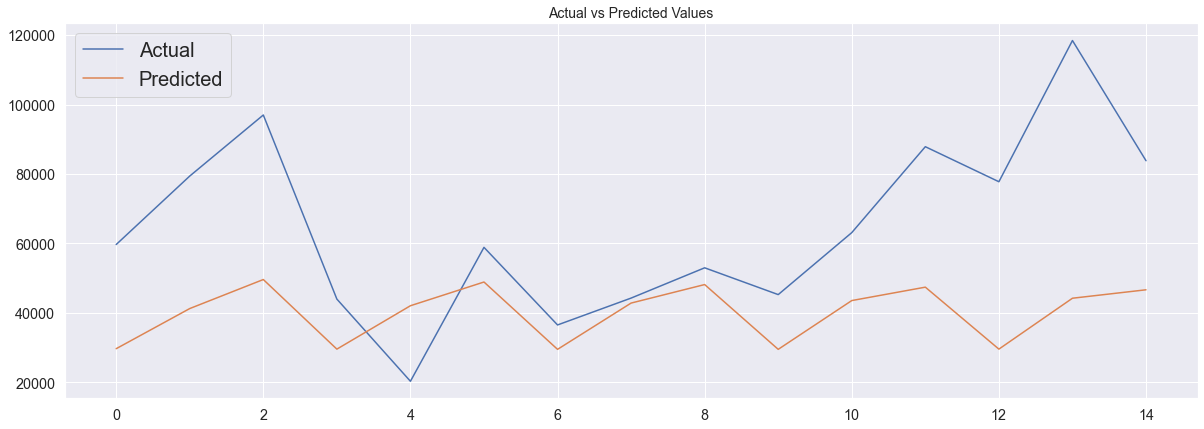

In [174]:
plt.subplots(figsize=(17,6))
plt.plot(df_final1.Actual, label='Actual')  
plt.plot(df_final1.Predicted, label='Predicted')
plt.tight_layout()
plt.legend(fontsize=20)
plt.title('Actual vs Predicted Values', fontsize=14)
plt.show()

In [175]:
fcast1 = m1.predict(start=len(df1), end=len(df1)+11, typ='levels')
print(fcast1)

2018-01-31    29681.948367
2018-02-28    44842.927025
2018-03-31    45884.296870
2018-04-30    29858.633694
2018-05-31    45413.227036
2018-06-30    45120.016494
2018-07-31    30087.119726
2018-08-31    45930.371532
2018-09-30    44359.661134
2018-10-31    30363.954086
2018-11-30    46393.621313
2018-12-31    43607.399540
Freq: M, Name: predicted_mean, dtype: float64


### Forcasting the future values 

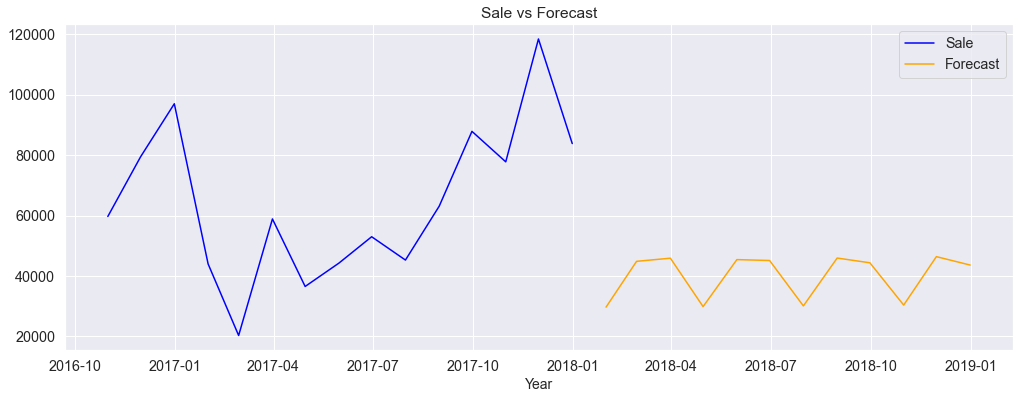

In [176]:
plt.subplots(figsize=(17,6))
# plt.plot(df1, color='skyblue', label='Sale')
plt.plot(test, color='blue', label='Sale')
# test.plot(figsize=(10,8),legend=True)
plt.plot(fcast1, color='orange', label='Forecast')
plt.legend()
plt.xlabel('Year', fontsize=14)
plt.title('Sale vs Forecast')
plt.show()

## Sarima Model

In [177]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

In [178]:
p=2; q=2; d=2

m2 = sm.tsa.statespace.SARIMAX(df1, order=(p,d,q), seasonal_order=(p,d,q,12)).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(2, 2, 2)x(2, 2, 2, 12)   Log Likelihood                -249.651
Date:                            Tue, 24 May 2022   AIC                            517.303
Time:                                    20:23:19   BIC                            527.122
Sample:                                01-31-2014   HQIC                           519.616
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3268      0.637     -2.083      0.037      -2.576      -0.078
ar.L2         -0.8406      0.922     -0.912      0.362      -2.648       0.966
ma.L1         -0.2277      1.036     -0.220      0.826      -2.259       1.803
ma.L2         -0.6779      0.732     -0.926      0.354      -2.112       0.756
ar.S.L12      -0.7911    628.715     -0.001      0.999   -1233.051    1231.469
ar.S.L24       0.0118     74.583      0.000      1.000    -146.169     146.192
ma.S.L12       0.2593    635.234      0.000      1.000   -1244.776    1245.295
ma.S.L24      -0.3912    255.403     -0.002      0.999    -500.973     500.190
sigma2      7.594e+08      0.000   1.56e+12      0.000    7.59e+08    7.59e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.25
Prob(Q):                              0.88   Prob(JB):                         0.88
Heteroskedasticity (H):               2.49   Skew:                             0.26
Prob(H) (two-sided):                  0.25   Kurtosis:                         3.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.37e+30. Standard errors may be unstable.
"""

In [179]:
start = len(train)
end = len(train) + len(test) - 1

print('Start : ',start,'\t End : ',end)

prediction2 = m2.predict(start, end)
prediction2

Start :  33 	 End :  47


Order Date
2016-10-31     33991.539414
2016-11-30     90617.972633
2016-12-31     99063.512587
2017-01-31     26710.610635
2017-02-28     18966.702110
2017-03-31     73840.057625
2017-04-30     48373.937963
2017-05-31     57754.681161
2017-06-30     40585.833557
2017-07-31     28147.423611
2017-08-31     22154.499925
2017-09-30    106535.699845
2017-10-31     76970.450343
2017-11-30    118622.408979
2017-12-31    115081.588427
Freq: M, Name: predicted_mean, dtype: float64

## Calculating the actual, predicted and error values 

In [180]:
actual2=[]; pred2=[]

for i in range(len(prediction2)):
    actual2.append(test[i])
    pred2.append(prediction2[i])

df_final2 = pd.DataFrame({'Actual' : actual2, 'Predicted': pred2})
df_final2['Error'] = df_final2['Actual'] - df_final2['Predicted']
df_final2.head()

,Actual,Predicted,Error
0,59687.7450,33991.539414,25696.205586
1,79411.9658,90617.972633,-11206.006833
2,96999.0430,99063.512587,-2064.469587
3,43971.3740,26710.610635,17260.763365
4,20301.1334,18966.702110,1334.431290


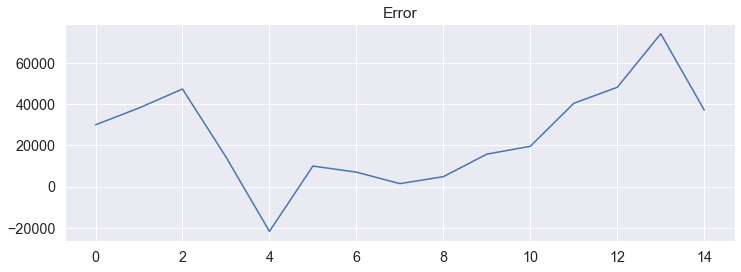

In [181]:
# Plotting the model

plt.subplots(figsize=(12,4))
plt.plot(df_final1.Error)
plt.title('Error')
plt.show()

### Plotting the actual and Predicted values

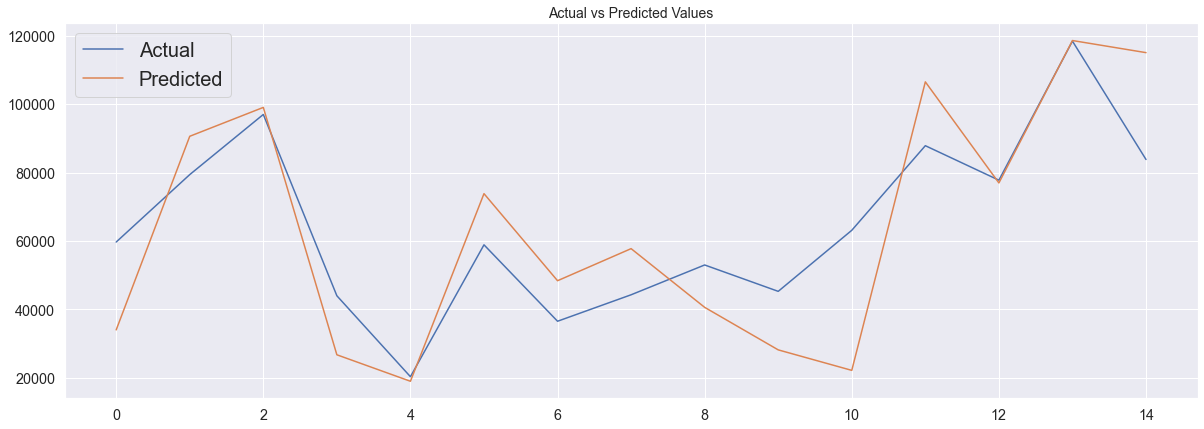

In [182]:
plt.subplots(figsize=(17,6))
plt.plot(df_final2.Actual, label='Actual')  
plt.plot(df_final2.Predicted, label='Predicted')
plt.tight_layout()
plt.legend(fontsize=20)
plt.title('Actual vs Predicted Values', fontsize=14)
plt.show()

In [183]:
fcast2 = m2.predict(start=len(df1), end=len(df1)+11, typ='levels')
print(fcast2)

2018-01-31     62589.914832
2018-02-28     30493.671810
2018-03-31     41707.119123
2018-04-30     55604.486618
2018-05-31     35082.863542
2018-06-30     53103.289176
2018-07-31     63129.261837
2018-08-31     57875.990539
2018-09-30    103541.114027
2018-10-31     93558.618912
2018-11-30    127002.882558
2018-12-31     94576.539429
Freq: M, Name: predicted_mean, dtype: float64


### Forcasting the future values

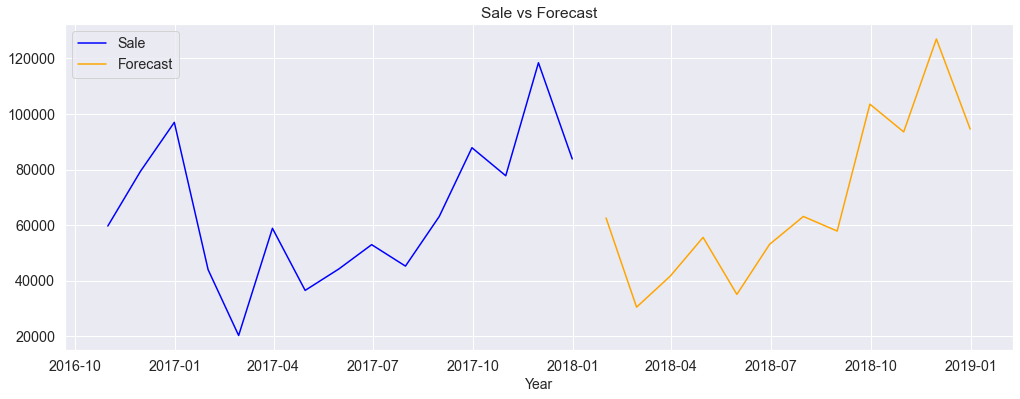

In [184]:
plt.subplots(figsize=(17,6))
plt.plot(test, color='blue', label='Sale')
plt.plot(fcast2, color='orange', label='Forecast')
plt.legend()
plt.xlabel('Year', fontsize=14)
plt.title('Sale vs Forecast')
plt.show()

## Conclusion :

## As per model evaluation, SARIMA model is giving best forecasting results for Furniture Sales.